1. Download the dataset and overlay the positive and negative grasping rectangles for each image on the raw image using the coordinates of the rectangles provided.

This looks like it can be done independently.

Parts
Import the images
  How do I import ALL of the images from a particular folder?
Import the rectangles
  same question
Add them together
  This should just be a matter of adding pixels together



In [1]:
#I need to make the reading of the grasping rectangles dependent on the img file being read.
#I need a data storage framework that can be initialized as empty, and  allows me to append tables of various size to a single variable
#I need to be able to index all rows and columns associated with a particular grasp rectnagle so that they can be called up by that index
#So far, the best candidate is a Dataframe where I continuously append tables, and then index all of the appendex values by the same index, Maybe
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import pandas as pd
import torch
import cv2
from PIL import Image
from IPython.display import display


(480, 640, 3)


<ipython-input-34-be674dfc2eca>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  neg_rect_single = pd.read_csv("/content/Input Data/pcd0100cneg.txt", delimiter='\s',header=None)
<ipython-input-34-be674dfc2eca>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pos_rect_single = pd.read_csv("/content/Input Data/pcd0100cpos.txt", delimiter='\s',header=None)


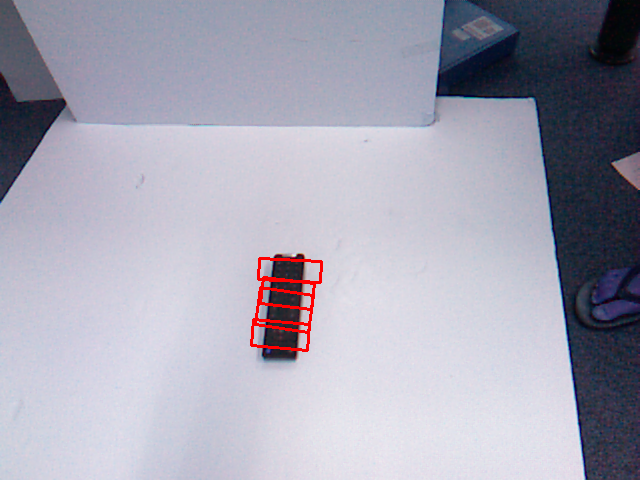

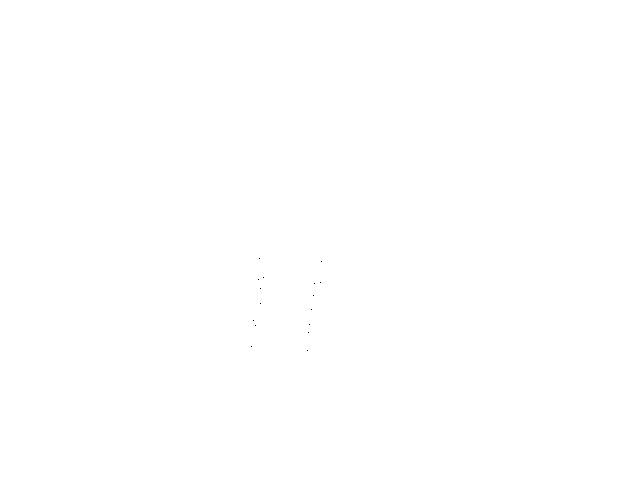

In [34]:
#Manually mapping grasp rectangles of first image to test understanding
img = cv2.imread('/content/Input Data/pcd0100r.png',1)
#display(Image.fromarray(img))

print(img.shape)
neg_rect_single = pd.read_csv("/content/Input Data/pcd0100cneg.txt", delimiter='\s',header=None)
neg_rect_single = neg_rect_single.to_numpy()
pos_rect_single = pd.read_csv("/content/Input Data/pcd0100cpos.txt", delimiter='\s',header=None)
pos_rect_single =pos_rect_single.to_numpy()
#plt.plot(neg_rect_single[:, 0], neg_rect_single[:, 1], 'ro') #plotting coordiantes to see magnitudes, confirmed they are pixel values
#plt.plot(pos_rect_single[:, 0], pos_rect_single[:, 1], 'ro')

# Create a random array of shape (height, width, 3) for a color image (RGB)
height, width = 480, 640
random_image = np.random.randint(255, 256, size=(height, width, 3), dtype=np.uint8) #Creates a white image of the same size to visualize the points on
i=0
#for item in neg_rect_single:
#  x,y = round(neg_rect_single[i,0]), round(neg_rect_single[i,1])
#  random_image[x,y,0]=0
#  random_image[x,y,1]=0
#  random_image[x,y,2]=0
#  img[x,y,0]=0
#  img[x,y,1]=0
#  img[x,y,2]=0
#  i=i+1
# I will not need to point plot anymore
i=0
for item in pos_rect_single:
 x,y = round(pos_rect_single[i,1]), round(pos_rect_single[i,0])
 random_image[x,y,0]=0
 random_image[x,y,1]=0
 random_image[x,y,2]=0
 img[x,y,0]=0
 img[x,y,1]=0
 img[x,y,2]=0
 i=i+1

# I need to be able to loop this for every set of 4 points.
#Generate Rectangle geometry
rectangle_pts1 = np.array([[253,319.7], [ 309,324], [307,350], [251,345.7]], np.int32)
rectangle_pts1 = rectangle_pts1.reshape((-1, 1, 2))
rectangle_pts2 = np.array([[255,324.877], [ 308,332], [313,295], [260,287.877]], np.int32)
rectangle_pts2 = rectangle_pts2.reshape((-1, 1, 2))
rectangle_pts3 = np.array([[260,303.092], [311,309], [314,283], [263,277.092]], np.int32)
rectangle_pts3 = rectangle_pts3.reshape((-1, 1, 2))
rectangle_pts4 = np.array([[258,279.04], [ 320,282], [321,261], [259,258.048]], np.int32)
rectangle_pts4 = rectangle_pts4.reshape((-1, 1, 2))

#Overlay Rectangle geometry
cv2.polylines(img, [rectangle_pts1], isClosed=True, color=(255, 0, 0), thickness=2)
cv2.polylines(img, [rectangle_pts2], isClosed=True, color=(255, 0, 0), thickness=2)
cv2.polylines(img, [rectangle_pts3], isClosed=True, color=(255, 0, 0), thickness=2)
cv2.polylines(img, [rectangle_pts4], isClosed=True, color=(255, 0, 0), thickness=2)

#Display the input image with rectangles overlaid
display(Image.fromarray(img))
# Display the points
display(Image.fromarray(random_image))


In [ ]:
# WIP
# Loading Images and Data
# Loop through all image files in the folder

folder_path = "/content/Input Data"
files= os.listdir(folder_path) #OS is an operating system object, listdir is a file objkect
files=sorted(files) #sorts in alphabetical order
images=[] #Declare images as an empty object
neg_rect=[]
pos_rect=[]
negrect_tensor = torch.empty((len(files), 11, 2))
negpos_tensor = torch.empty((len(files), 16, 2))
j=0
k=0
l=0
for filename in files:
    print(filename)
    #Extract search string from filename, by extracting first 8 characters

    if filename.endswith((".txt")):  #look for png files
        if ("cneg") in filename:
         print("cneg")
         neg_rect= pd.read_csv("/content/Input Data/"+str(filename), delimiter='\s')
         #I need to get a tensor that allows a table of data to be indexed with indices that align to the image loader...I think we did this on the first homework
         #neg_rect=neg_rect.to_numpy()
         #tensor_temp = torch.from_numpy(neg_rect)
         #print("j:", j)
         #negrect_tensor[j,:,:]=tensor_temp #Tables are of differing size, I want an idexable table of various size
         #print(negrect_tensor[j])
         #j=j+1
         continue
        elif ("cpos") in filename:
          print("cpos")
          continue
        else:
          print("point cloud")
          continue
    elif filename.endswith((".png")):  #look for png files
        print("png")
        img_path = os.path.join(folder_path, filename)
        img = mpimg.imread(img_path)  # Read the image
        images.append(img)
        continue
    elif filename.endswith((".tiff")):  #look for png files
        print("tiff")
print(f"Loaded {len(images)} images")

pcd0100.txt
point cloud
pcd0100cneg.txt
cneg
pcd0100cpos.txt
cpos
pcd0100d.tiff
tiff
pcd0100r.png
png
pcd0101.txt
point cloud
pcd0101cneg.txt
cneg
pcd0101cpos.txt
cpos
pcd0101d.tiff
tiff
pcd0101r.png
png
pcd0102.txt
point cloud
pcd0102cneg.txt
cneg
pcd0102cpos.txt
cpos
pcd0102d.tiff
tiff
pcd0102r.png
png
pcd0103.txt
point cloud
pcd0103cneg.txt
cneg
pcd0103cpos.txt
cpos
pcd0103d.tiff
tiff
pcd0103r.png
png
pcd0104.txt
point cloud
pcd0104cneg.txt
cneg
pcd0104cpos.txt
cpos
pcd0104d.tiff
tiff
pcd0104r.png
png
pcd0105.txt
point cloud
pcd0105cneg.txt
cneg
pcd0105cpos.txt
cpos
pcd0105d.tiff
tiff
pcd0105r.png
png
pcd0106.txt
point cloud
pcd0106cneg.txt
cneg
pcd0106cpos.txt
cpos
pcd0106d.tiff
tiff
pcd0106r.png
png
pcd0107.txt
point cloud
pcd0107cneg.txt
cneg
pcd0107cpos.txt
cpos
pcd0107d.tiff
tiff
pcd0107r.png
png
Loaded 8 images


In [ ]:
#Experimimenting with tensors to store rectangle points
#REF ONLY IGNORE
print(len(files))
negrect_tensor[0] = torch.empty((1, 2, 3))

print(negrect_tensor.shape)
print(negrect_tensor[0])


40
torch.Size([1, 2, 3])
tensor([[-1.4598e+13,  4.4219e-41,  2.0443e-31],
        [ 0.0000e+00,  4.4842e-44,  0.0000e+00]])


In [ ]:
#Experimimenting with tensors to store rectangle points
#REF ONLY IGNORE
negrect_tensor[0] = torch.tensor([[[1, 2, 3], [4, 5, 6]],])
new_table = np.array([[19, 20, 21], [22, 23, 24]])
negrect_tensor[1]= new_table
# Create a PyTorch tensor with 3 tables, 2 rows, and 3 columns
tensor = torch.tensor([
    [[1, 2, 3], [4, 5, 6]],
    [[7, 8, 9], [10, 11, 12]],
    [[13, 14, 15], [16, 17, 18]]
])

#print(tensor.shape)  # Output: torch.Size([3, 2, 3])
#print(tensor[1])  # Access Table 1
print(negrect_tensor.shape)
print(negrect_tensor[0,:,:])


TypeError: can't assign a numpy.ndarray to a torch.FloatTensor